In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
from sklearn.linear_model import LinearRegression


# These becuase we have many features, and we want to display all of them
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)


plt.rcParams["figure.figsize"] = (7, 4)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [2]:
# pip install pandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.1.3-cp39-cp39-win_amd64.whl (10.8 MB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Using cached numpy-1.26.2-cp39-cp39-win_amd64.whl (15.8 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [4]:
# pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 7.6/7.6 MB 7.9 MB/s eta 0:00:00
  Using cached Pillow-10.1.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
     ---------------------------------------- 56.2/56.2 KB ? eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 2.2/2.2 MB 10.6 MB/s eta 0:00:00
     ------------------------------------- 181.9/181.9 KB 11.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [6]:
# pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [8]:
# pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 9.3/9.3 MB 5.9 MB/s eta 0:00:00
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached scipy-1.11.4-cp39-cp39-win_amd64.whl (44.3 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [ ]:
# pip install --upgrade pip 

In [3]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [4]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [5]:
df.tail()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
15910,Renault Espace,Van,39950,VAT deductible,1647.363,New,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15911,Renault Espace,Van,39885,VAT deductible,9900.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400
15912,Renault Espace,Van,39875,VAT deductible,15.000,Pre-registered,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,146.000,1,Metallic,Part/Full Leather,Automatic,1997.000,1734.000,front,5.300
15913,Renault Espace,Van,39700,VAT deductible,10.000,Pre-registered,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15914,Renault Espace,Van,40999,VAT deductible,1647.363,Demonstration,Benzine,6.000,"Air conditioning,Automatic climate control,Cru...",USB,"Alloy wheels,Touch screen","ABS,Blind spot monitor,Daytime running lights,...",0.000,1.000,165.000,1,Metallic,Part/Full Leather,Automatic,1798.000,1685.000,4WD,6.800


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.000,18024.381,7381.679,4950.000,12850.000,16900.000,21900.000,74600.000
km,15915.000,32089.996,36977.215,0.000,1920.500,20413.000,46900.000,317000.000
Gears,15915.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15915.000,1.390,1.121,0.000,0.000,1.000,2.000,3.000
Previous_Owners,15915.000,1.043,0.339,0.000,1.000,1.000,1.000,4.000
hp_kW,15915.000,88.499,26.674,40.000,66.000,85.000,103.000,294.000
Inspection_new,15915.000,0.247,0.431,0.000,0.000,0.000,0.000,1.000
Displacement_cc,15915.000,1428.662,275.804,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,15915.000,1337.701,199.682,840.000,1165.000,1295.000,1472.000,2471.000
cons_comb,15915.000,4.832,0.868,3.000,4.100,4.800,5.400,9.100


In [8]:
df.duplicated().sum()

1673

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.make_model.value_counts()

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

In [13]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.000,Employee's car,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.000,1.000,85.000,0,Metallic,Cloth,Manual,1598.000,1135.000,front,4.900


In [ ]:
# df.drop(index=[2614], inplace =True)

In [14]:
drop_model = df.make_model.value_counts()[df.make_model.value_counts() <= 100].index
drop_model

Index(['Renault Duster', 'Audi A2'], dtype='object', name='make_model')

In [15]:
df.shape

(14242, 23)

In [16]:
for i in drop_model:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)

In [17]:
df.make_model.value_counts()

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Name: count, dtype: int64

In [18]:
df.shape

(14221, 23)

In [19]:
df.head(5)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [20]:
df.Gearing_Type.value_counts()

Gearing_Type
Manual            7215
Automatic         6542
Semi-automatic     464
Name: count, dtype: int64

In [21]:
df.Extras.value_counts()

Extras
Alloy wheels                                                                                               5009
Alloy wheels,Touch screen                                                                                   609
Alloy wheels,Voice Control                                                                                  535
Alloy wheels,Touch screen,Voice Control                                                                     509
Roof rack                                                                                                   491
                                                                                                           ... 
Alloy wheels,Handicapped enabled,Shift paddles,Voice Control                                                  1
Alloy wheels,Handicapped enabled,Shift paddles                                                                1
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice C

In [22]:
df.Extras.sample(10)

1430     Alloy wheels,Cab or rented Car,Sport seats,Voi...
25                               Alloy wheels,Winter tyres
8331                                          Alloy wheels
8189                                          Alloy wheels
1212                                         Voice Control
12689                                         Alloy wheels
5169                 Alloy wheels,Sport seats,Touch screen
2343                            Alloy wheels,Voice Control
2382                                          Alloy wheels
10932              Alloy wheels,Touch screen,Voice Control
Name: Extras, dtype: object

In [23]:
df.Extras.apply(lambda x: len(x.split(',')))

0        3
1        4
2        2
3        3
4        4
        ..
14216    3
14217    2
14218    5
14219    3
14220    1
Name: Extras, Length: 14221, dtype: int64

In [24]:
df["Extras"] = df.Extras.apply(lambda x: len(x.split(',')))

In [25]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",3,"ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",4,"ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",2,"ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",3,"ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",4,"ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [26]:
df.Extras.nunique() 

10

In [27]:
df["Entertainment_Media"] = df.Entertainment_Media.apply(lambda x: len(x.split(',')))

In [28]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...",4,3,"ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...",5,4,"ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...",2,2,"ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...",8,3,"ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...",7,4,"ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [29]:
df["Comfort_Convenience"] = df.Comfort_Convenience.apply(lambda x: len(x.split(',')))

In [30]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,16,4,3,"ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,9,5,4,"ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,13,2,2,"ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,16,8,3,"ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,13,7,4,"ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [31]:
df["Safety_Security"] = df.Safety_Security.apply(lambda x: len(x.split(',')))

In [32]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [33]:
df.make_model.nunique() 

7

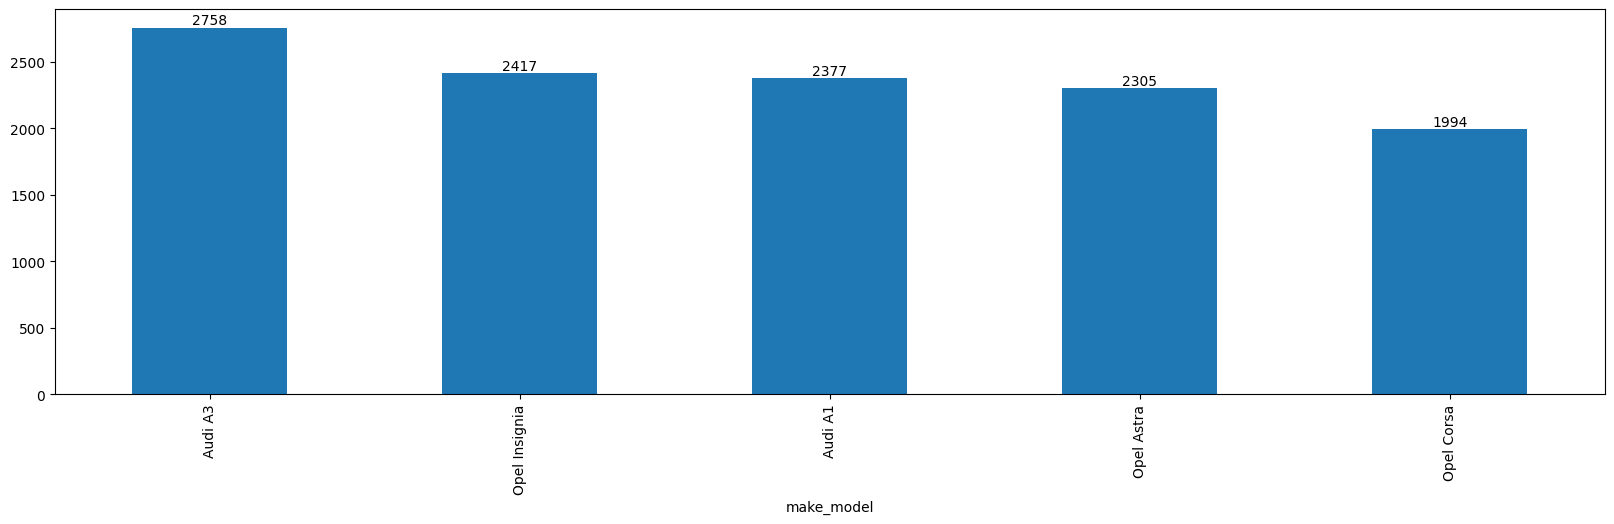

In [34]:
ax = df.make_model.value_counts().iloc[:5].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

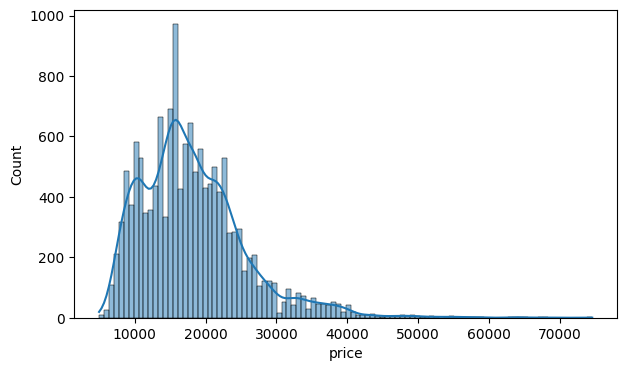

In [35]:
sns.histplot(df.price, bins=100, kde=True);

In [36]:
skew(df.price)

1.2668278550941403

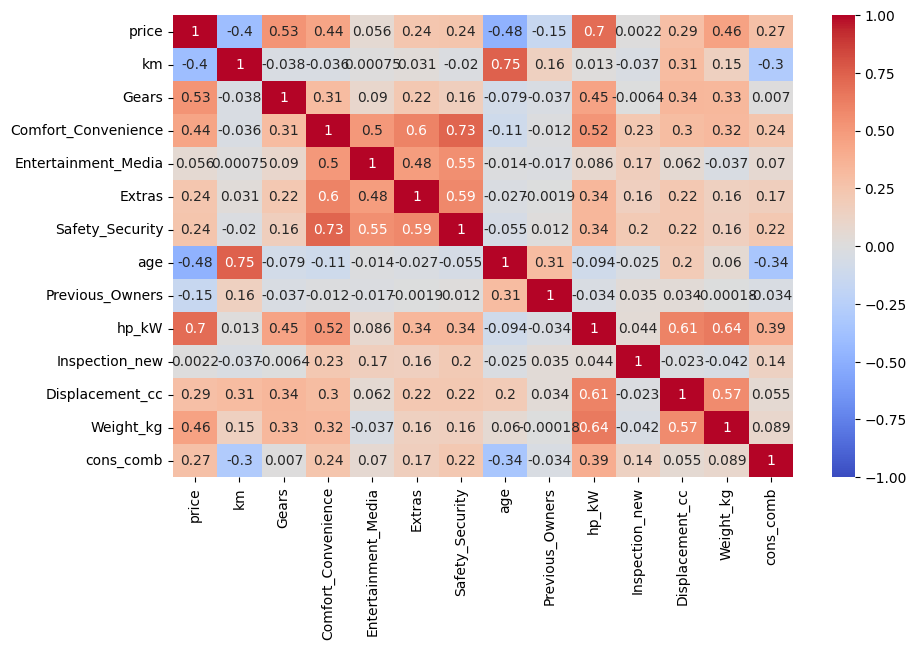

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");

In [38]:
df.corr(numeric_only=True)[(abs(df.corr(numeric_only=True))>= 0.9) & (abs(df.corr(numeric_only=True)) < 1)] .any().any()

False

<Axes: ylabel='price'>

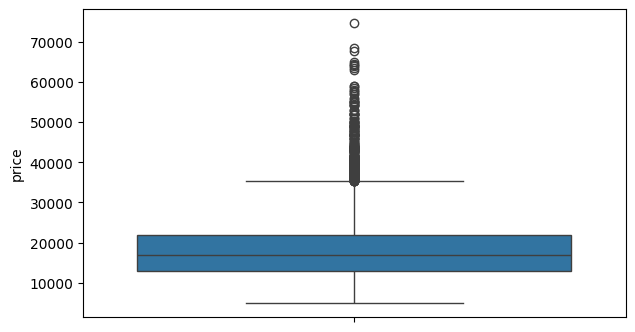

In [39]:
sns.boxplot(df.price)

<Axes: xlabel='make_model', ylabel='price'>

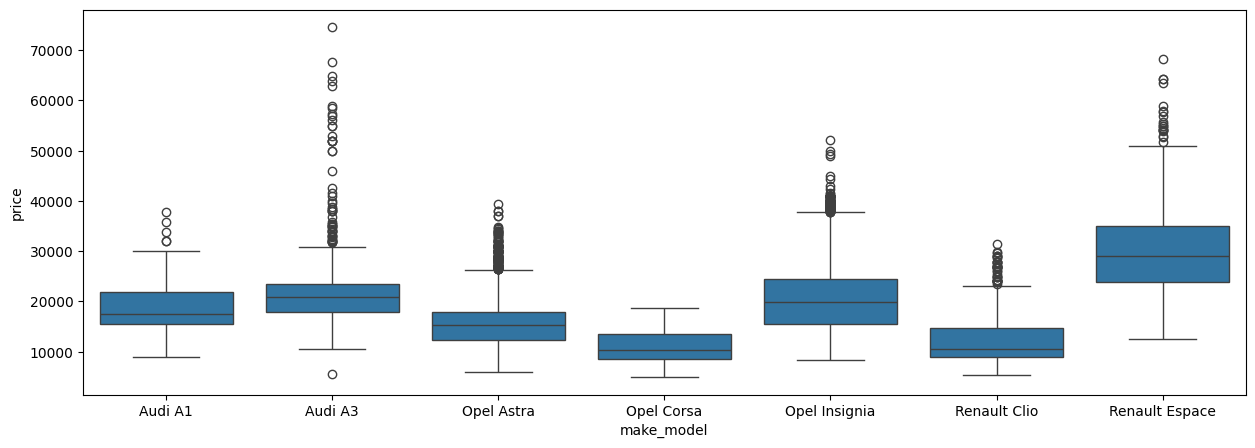

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, y="price", x="make_model")

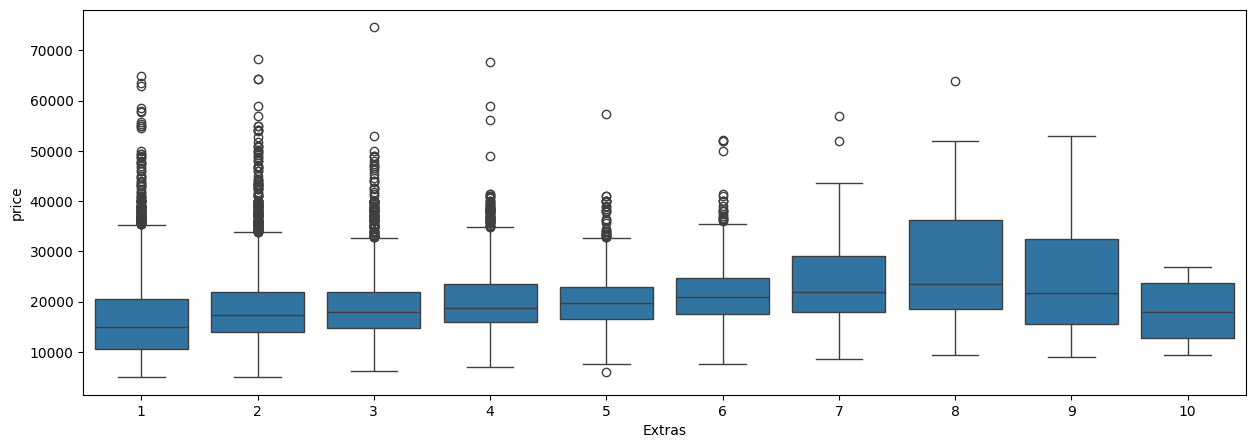

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x="Extras", y="price")
plt.show()

<Axes: xlabel='Inspection_new', ylabel='price'>

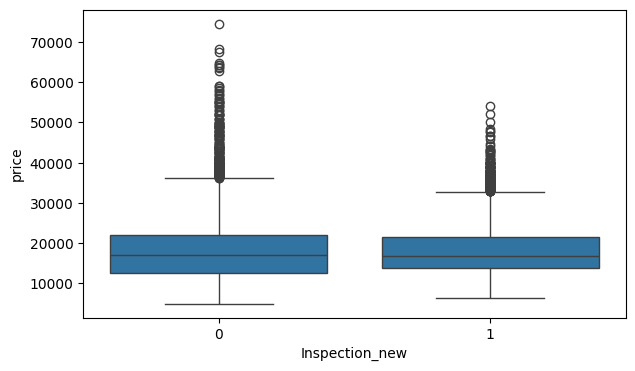

In [42]:
sns.boxplot(data=df, y="price",x="Inspection_new" )

In [43]:
total_outliers = []

for model in df.make_model.unique():

    car_prices = df[df["make_model"]== model]["price"]

    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5*IQR
    upper_lim = Q3 + 1.5*IQR

    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()

    total_outliers.append(count_of_outliers)

    print(f" The count of outlier for {model:<24} : {count_of_outliers:<2},\
    The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))


 The count of outlier for Audi A1                  : 5 ,    The rate of outliers : 0.002
 The count of outlier for Audi A3                  : 56,    The rate of outliers : 0.02
 The count of outlier for Opel Astra               : 127,    The rate of outliers : 0.055
 The count of outlier for Opel Corsa               : 0 ,    The rate of outliers : 0.0
 The count of outlier for Opel Insignia            : 109,    The rate of outliers : 0.045
 The count of outlier for Renault Clio             : 37,    The rate of outliers : 0.025
 The count of outlier for Renault Espace           : 20,    The rate of outliers : 0.023

Total_outliers :  354 The rate of total outliers : 0.025


In [44]:
copydata = df.copy()

In [45]:
X= df.drop(columns="price")
y= df.price

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
df.select_dtypes(include="object").head(1)

,make_model,body_type,vat,Type,Fuel,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,Metallic,Cloth,Automatic,front


In [48]:
df.Type.value_counts()

Type
Used              10163
New                1358
Pre-registered     1029
Employee's car      904
Demonstration       767
Name: count, dtype: int64

### ordinal encoder only

In [49]:
cat = X_train.select_dtypes("object").columns
cat

Index(['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')

In [51]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
ordinall_enc = OrdinalEncoder()
column_transformy = make_column_transformer((ordinall_enc, cat), remainder='passthrough',
                                       verbose_feature_names_out=False).set_output(transform="pandas") # remainder: # Keep other columns rather than cat in original form.

In [52]:
X_train_trany = column_transformy.fit_transform(X_train)
X_test_trany = column_transformy.transform(X_test)

In [57]:
from sklearn.ensemble import RandomForestRegressor
randomord = RandomForestRegressor()

In [58]:
randomord.fit(X_train_trany, y_train)

RandomForestRegressor()

In [60]:
prdtest = randomord.predict(X_test_trany)

In [61]:
eval_metric(y_test, prdtest)

r2_score: 0.9458109276290295 
mae: 1027.4104893351034 
mse: 2963396.621164751 
rmse: 1721.4518933634918


In [62]:
train_val(randomord, X_train_trany, y_train, X_test_trany, y_test)

,train,test
R2,0.992,0.946
mae,390.997,1027.410
mse,418596.264,2963396.621
rmse,646.990,1721.452


In [63]:
scorey = cross_validate(randomord,
                        X_train_trany,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [64]:
pd.DataFrame(scorey)
pd.DataFrame(scorey).iloc[:, 2:].mean()

test_r2                                    0.945
train_r2                                   0.992
test_neg_mean_absolute_error           -1049.147
train_neg_mean_absolute_error           -394.292
test_neg_mean_squared_error         -3045819.149
train_neg_mean_squared_error         -432790.926
test_neg_root_mean_squared_error       -1740.908
train_neg_root_mean_squared_error       -657.818
dtype: float64

### with onehot and ordinal

In [65]:
cat_onehot = ['make_model', 'body_type','vat' ,'Fuel', 'Upholstery_type', 'Gearing_Type', 'Drive_chain', 'Paint_Type']
cat_ordinal = ['Type']
cat_for_Type = ["Used", "New", "Pre-registered", "Employee's car", "Demonstration"]

In [66]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                        (OrdinalEncoder(categories= [cat_for_Type],
                                       handle_unknown="use_encoded_value",
                                        unknown_value=-1) ,cat_ordinal),remainder='passthrough',
                         #remainder= StandardScaler(),
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

In [67]:
X_train.head()

,make_model,body_type,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
14210,Renault Espace,Compact,VAT deductible,500.000,Demonstration,Benzine,6.000,26,7,2,19,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1760.000,front,6.800
10027,Opel Insignia,Station wagon,VAT deductible,68116.000,Used,Diesel,6.000,13,6,3,13,3.000,1.000,100.000,1,Metallic,Cloth,Manual,1598.000,1487.000,front,3.900
318,Audi A1,Compact,VAT deductible,56967.000,Used,Benzine,7.000,13,6,2,13,3.000,2.000,70.000,1,Metallic,Cloth,Automatic,999.000,1180.000,front,4.400
4098,Audi A3,Sedans,VAT deductible,21000.000,Employee's car,Diesel,6.000,17,8,4,18,1.000,1.000,85.000,0,Metallic,Part/Full Leather,Manual,1598.000,1335.000,front,4.000
3344,Audi A3,Sedans,VAT deductible,26613.000,Used,Benzine,7.000,16,7,3,13,2.000,1.000,110.000,0,Metallic,Cloth,Automatic,1395.000,1300.000,front,4.600


In [68]:
X_test.head()

,make_model,body_type,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
7261,Opel Astra,Station wagon,VAT deductible,1647.363,New,Benzine,6.000,17,5,1,14,0.000,1.000,67.000,0,Metallic,Cloth,Manual,1000.000,1425.000,front,4.500
8215,Opel Corsa,Sedans,VAT deductible,31398.000,Used,Diesel,5.000,4,4,1,9,2.000,1.000,55.000,0,Metallic,Cloth,Manual,1248.000,1162.000,front,3.800
13945,Renault Espace,Van,VAT deductible,29500.000,Used,Diesel,6.000,15,5,2,7,2.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1734.000,front,4.700
6684,Opel Astra,Sedans,VAT deductible,16950.000,Used,Benzine,6.000,9,4,2,13,1.000,1.000,92.000,0,Metallic,Cloth,Manual,1399.000,1278.000,front,5.400
13394,Renault Espace,Van,Price negotiable,41000.000,Used,Diesel,6.000,16,4,2,12,2.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1734.000,front,4.600


In [69]:
X_train.shape, X_test.shape

((11376, 22), (2845, 22))

In [70]:
df.vat.value_counts()

vat
VAT deductible      13405
Price negotiable      816
Name: count, dtype: int64

In [71]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

In [72]:
X_train_trans.shape, X_test_trans.shape 

((11376, 46), (2845, 46))

In [73]:
X_train_trans.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,...,Paint_Type_Uni/basic,Type,km,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
14210,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,4.000,500.000,6.000,26,7,2,19,0.000,1.000,165.000,0,1798.000,1760.000,6.800
10027,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,0.000,68116.000,6.000,13,6,3,13,3.000,1.000,100.000,1,1598.000,1487.000,3.900
318,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,56967.000,7.000,13,6,2,13,3.000,2.000,70.000,1,999.000,1180.000,4.400
4098,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,3.000,21000.000,6.000,17,8,4,18,1.000,1.000,85.000,0,1598.000,1335.000,4.000
3344,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,26613.000,7.000,16,7,3,13,2.000,1.000,110.000,0,1395.000,1300.000,4.600


In [74]:
X_test_trans.head()

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,...,Paint_Type_Uni/basic,Type,km,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
7261,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,1.000,1647.363,6.000,17,5,1,14,0.000,1.000,67.000,0,1000.000,1425.000,4.500
8215,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,31398.000,5.000,4,4,1,9,2.000,1.000,55.000,0,1248.000,1162.000,3.800
13945,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,29500.000,6.000,15,5,2,7,2.000,1.000,118.000,0,1598.000,1734.000,4.700
6684,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,16950.000,6.000,9,4,2,13,1.000,1.000,92.000,0,1399.000,1278.000,5.400
13394,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,41000.000,6.000,16,4,2,12,2.000,1.000,118.000,0,1598.000,1734.000,4.600


In [104]:
# pip install --upgrade pip 

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 2.1/2.1 MB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [107]:
# pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 751.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ------------------------------------- -- 92.2/97.9 kB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 97.9/97.9 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.3 MB 5.8 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.3 MB 5.6 MB/s eta 0:00:01
   ------------------- -------------------- 0.6/1.3 MB 4.9 MB/s eta 0:00:01
   ---------------------------- ----------- 0.9/1.3 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 6.4 MB/s eta 0:00:01
   ------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [75]:
from lazypredict.Supervised import LazyRegressor

In [76]:
reg = LazyRegressor(verbose=1, ignore_warnings=True, custom_metric=None)
models,pred = reg.fit(X_train_trans, X_test_trans, y_train, y_test)
models

  2%|█▉                                                                                 | 1/42 [00:01<00:48,  1.19s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.7242813002128834, 'Adjusted R-Squared': 0.7197483980719943, 'RMSE': 3883.0424939666264, 'Time taken': 1.1887950897216797}


  7%|█████▉                                                                             | 3/42 [00:02<00:24,  1.62it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9427601511675233, 'Adjusted R-Squared': 0.9418191100501917, 'RMSE': 1769.2461997009725, 'Time taken': 0.9062755107879639}
{'Model': 'BayesianRidge', 'R-Squared': 0.8599721102919438, 'Adjusted R-Squared': 0.8576700077449206, 'RMSE': 2767.2366711007717, 'Time taken': 0.12283992767333984}


 10%|███████▉                                                                           | 4/42 [00:02<00:15,  2.38it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.908493262892958, 'Adjusted R-Squared': 0.9069888633551009, 'RMSE': 2236.9978529248597, 'Time taken': 0.12041664123535156}
{'Model': 'DummyRegressor', 'R-Squared': -5.218682934149399e-05, 'Adjusted R-Squared': -0.01649335930759377, 'RMSE': 7395.2075006247005, 'Time taken': 0.04193520545959473}


 14%|███████████▊                                                                       | 6/42 [00:02<00:11,  3.10it/s]

{'Model': 'ElasticNet', 'R-Squared': 0.8275899915506463, 'Adjusted R-Squared': 0.8247555167870042, 'RMSE': 3070.578954128213, 'Time taken': 0.4293355941772461}


 17%|█████████████▊                                                                     | 7/42 [00:03<00:12,  2.90it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.5326634503523894, 'Adjusted R-Squared': 0.524980290493994, 'RMSE': 5055.381167650319, 'Time taken': 0.402449369430542}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9138055790599834, 'Adjusted R-Squared': 0.9123885156706908, 'RMSE': 2171.0939170661945, 'Time taken': 0.09048914909362793}


 21%|█████████████████▊                                                                 | 9/42 [00:08<00:42,  1.29s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9500632607906294, 'Adjusted R-Squared': 0.9492422850924053, 'RMSE': 1652.529125010248, 'Time taken': 4.89826226234436}
{'Model': 'GammaRegressor', 'R-Squared': 0.7985606562306109, 'Adjusted R-Squared': 0.7952489300642807, 'RMSE': 3319.030026090149, 'Time taken': 0.08817410469055176}


 26%|█████████████████████▍                                                            | 11/42 [00:46<04:14,  8.22s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -204.08099603028256, 'Adjusted R-Squared': -207.45259210511927, 'RMSE': 105901.40973518643, 'Time taken': 38.436328172683716}


 29%|███████████████████████▍                                                          | 12/42 [00:48<03:26,  6.88s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.92288349950271, 'Adjusted R-Squared': 0.9216156799805959, 'RMSE': 2053.585026241114, 'Time taken': 1.9799115657806396}


 31%|█████████████████████████▍                                                        | 13/42 [00:51<02:48,  5.81s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9438982394026066, 'Adjusted R-Squared': 0.9429759088138003, 'RMSE': 1751.5691104564223, 'Time taken': 2.354313850402832}


 33%|███████████████████████████▎                                                      | 14/42 [00:51<02:04,  4.44s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.8451966071535977, 'Adjusted R-Squared': 0.8426515906879313, 'RMSE': 2909.5730796371954, 'Time taken': 0.3728370666503906}


 36%|█████████████████████████████▎                                                    | 15/42 [00:51<01:30,  3.36s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8721414866770111, 'Adjusted R-Squared': 0.8700394525051535, 'RMSE': 2644.2581862061243, 'Time taken': 0.3455941677093506}


 40%|█████████████████████████████████▏                                                | 17/42 [01:05<01:51,  4.45s/it]

{'Model': 'KernelRidge', 'R-Squared': -5.1568487192019274, 'Adjusted R-Squared': -5.258069248538343, 'RMSE': 18349.24813633428, 'Time taken': 13.545132875442505}
{'Model': 'Lars', 'R-Squared': 0.8599471007485928, 'Adjusted R-Squared': 0.8576445870368112, 'RMSE': 2767.4837798579333, 'Time taken': 0.11887288093566895}


 43%|███████████████████████████████████▏                                              | 18/42 [01:05<01:17,  3.24s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8580086910296516, 'Adjusted R-Squared': 0.8556743092524407, 'RMSE': 2786.5697211862607, 'Time taken': 0.23514389991760254}


 45%|█████████████████████████████████████                                             | 19/42 [01:23<02:50,  7.41s/it]

{'Model': 'Lasso', 'R-Squared': 0.8599691181532371, 'Adjusted R-Squared': 0.8576669664145126, 'RMSE': 2767.266236324314, 'Time taken': 17.569599866867065}


 48%|███████████████████████████████████████                                           | 20/42 [01:25<02:10,  5.94s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8600457132678141, 'Adjusted R-Squared': 0.8577448207768632, 'RMSE': 2766.5093030525204, 'Time taken': 2.413220167160034}
{'Model': 'LassoLars', 'R-Squared': 0.8599692018568755, 'Adjusted R-Squared': 0.8576670514942651, 'RMSE': 2767.2654092557273, 'Time taken': 0.06759834289550781}


 55%|████████████████████████████████████████████▉                                     | 23/42 [01:26<00:47,  2.51s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8600459630472035, 'Adjusted R-Squared': 0.8577450746627043, 'RMSE': 2766.50683432745, 'Time taken': 0.20050811767578125}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8599888250961981, 'Adjusted R-Squared': 0.8576869973458139, 'RMSE': 2767.071506861831, 'Time taken': 0.12276411056518555}
{'Model': 'LinearRegression', 'R-Squared': 0.8600557335170318, 'Adjusted R-Squared': 0.8577550057621295, 'RMSE': 2766.4102649682673, 'Time taken': 0.06447386741638184}


 60%|████████████████████████████████████████████████▊                                 | 25/42 [01:26<00:25,  1.50s/it]

{'Model': 'LinearSVR', 'R-Squared': -0.5413291143150147, 'Adjusted R-Squared': -0.5666690497183353, 'RMSE': 9180.93099752298, 'Time taken': 0.06482744216918945}


 62%|██████████████████████████████████████████████████▊                               | 26/42 [01:38<01:02,  3.88s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.7655583936621078, 'Adjusted R-Squared': 0.7617040999195978, 'RMSE': 3580.604693058745, 'Time taken': 11.95487904548645}


 69%|████████████████████████████████████████████████████████▌                         | 29/42 [01:45<00:36,  2.80s/it]

{'Model': 'NuSVR', 'R-Squared': 0.043987136967537754, 'Adjusted R-Squared': 0.028269984823329875, 'RMSE': 7230.542783454297, 'Time taken': 7.254997491836548}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7518881731836713, 'Adjusted R-Squared': 0.7478091367170697, 'RMSE': 3683.5177381040867, 'Time taken': 0.048015594482421875}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7756093712867421, 'Adjusted R-Squared': 0.7719203187775177, 'RMSE': 3503.0101045496403, 'Time taken': 0.11023330688476562}


 74%|████████████████████████████████████████████████████████████▌                     | 31/42 [01:45<00:19,  1.79s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8409904958473386, 'Adjusted R-Squared': 0.8383763295889317, 'RMSE': 2948.835688611552, 'Time taken': 0.07892990112304688}
{'Model': 'PoissonRegressor', 'R-Squared': 0.8911351117051981, 'Adjusted R-Squared': 0.8893453387024959, 'RMSE': 2439.961355660497, 'Time taken': 0.07913661003112793}


 79%|████████████████████████████████████████████████████████████████▍                 | 33/42 [01:46<00:11,  1.24s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -8.886064107988072e+24, 'Adjusted R-Squared': -9.032153796682659e+24, 'RMSE': 2.204417009412108e+16, 'Time taken': 0.30915403366088867}


 81%|██████████████████████████████████████████████████████████████████▍               | 34/42 [01:54<00:21,  2.64s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9487489981857333, 'Adjusted R-Squared': 0.9479064155969356, 'RMSE': 1674.1339818966553, 'Time taken': 8.27958869934082}
{'Model': 'Ridge', 'R-Squared': 0.8599492743049852, 'Adjusted R-Squared': 0.8576467963271543, 'RMSE': 2767.4623047387768, 'Time taken': 0.057624101638793945}


 86%|██████████████████████████████████████████████████████████████████████▎           | 36/42 [01:54<00:10,  1.72s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.8599677824446568, 'Adjusted R-Squared': 0.8576656087464631, 'RMSE': 2767.279434314617, 'Time taken': 0.14852046966552734}
{'Model': 'SGDRegressor', 'R-Squared': -319633379.39840555, 'Adjusted R-Squared': -324888252.70016634, 'RMSE': 132210240.81633146, 'Time taken': 0.05073833465576172}


 95%|██████████████████████████████████████████████████████████████████████████████    | 40/42 [02:07<00:04,  2.21s/it]

{'Model': 'SVR', 'R-Squared': 0.045789034445444576, 'Adjusted R-Squared': 0.03010150606248896, 'RMSE': 7223.7254893368, 'Time taken': 12.398274898529053}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8600557335170318, 'Adjusted R-Squared': 0.8577550057621295, 'RMSE': 2766.4102649682673, 'Time taken': 0.08385944366455078}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7858493722238065, 'Adjusted R-Squared': 0.7823286685505738, 'RMSE': 3422.147373062123, 'Time taken': 0.06345009803771973}


 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [02:08<00:02,  2.08s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9494223394060252, 'Adjusted R-Squared': 0.9485908267586617, 'RMSE': 1663.1001442232302, 'Time taken': 1.4912679195404053}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 11376, number of used features: 40
[LightGBM] [Info] Start training from score 18118.110847


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [02:09<00:00,  3.08s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9455044710620852, 'Adjusted R-Squared': 0.9446085474269372, 'RMSE': 1726.3127116943422, 'Time taken': 0.8429179191589355}


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.95,0.95,1652.53,4.90
XGBRegressor,0.95,0.95,1663.10,1.49
RandomForestRegressor,0.95,0.95,1674.13,8.28
LGBMRegressor,0.94,0.95,1726.31,0.84
HistGradientBoostingRegressor,0.94,0.94,1751.57,2.35
...,...,...,...,...
LinearSVR,-0.57,-0.54,9180.93,0.06
KernelRidge,-5.26,-5.16,18349.25,13.55
GaussianProcessRegressor,-207.45,-204.08,105901.41,38.44


In [77]:
from xgboost import XGBRegressor

In [78]:
xgb = XGBRegressor()
xgb.fit(X_train_trans, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [79]:
predG = xgb.predict(X_test_trans)

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [81]:
def eval_metric(actual, pred):
    """Prints regression metrics, calculated using the given
    actual and predicted target values.
    Args:
        actual (list): Actual target values.
        pred (list): Predicted target values.
    Returns:
        None
    """
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [82]:
eval_metric(y_test, predG)

r2_score: 0.9494223394060252 
mae: 1058.4033254613357 
mse: 2765902.0897153295 
rmse: 1663.1001442232302


In [83]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),
                        "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
              "test": {"R2" : r2_score(y_test, y_pred),
                       "mae" : mean_absolute_error(y_test, y_pred),
                       "mse" : mean_squared_error(y_test, y_pred),
                       "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}

    return pd.DataFrame(scores)

In [84]:
train_val(xgb, X_train_trans, y_train, X_test_trans, y_test)

,train,test
R2,0.98,0.95
mae,703.70,1058.40
mse,945715.23,2765902.09
rmse,972.48,1663.10


In [85]:
df.price.mean()

18107.423458265945

In [86]:
scores = cross_validate(xgb,
                        X_train_trans,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [87]:
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.94
train_r2                                   0.98
test_neg_mean_absolute_error           -1092.18
train_neg_mean_absolute_error           -680.00
test_neg_mean_squared_error         -3058754.12
train_neg_mean_squared_error         -887978.92
test_neg_root_mean_squared_error       -1745.07
train_neg_root_mean_squared_error       -942.23
dtype: float64

In [88]:
1663.1001442232302/df.price.mean()

0.09184631640478004

In [89]:
xgB = XGBRegressor(base_score=0.5, booster='gbtree', max_depth=6,
             n_estimators=100, n_jobs=4, random_state=1,gamma=1.5,
             tree_method='exact', validate_parameters=1,learning_rate=1,verbosity=None)
xgB.fit(X_train_trans, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1.5, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=4,
             num_parallel_tree=None, random_state=1, ...)

In [90]:
predGB = xgB.predict(X_test_trans)

In [91]:
eval_metric(y_test, predGB)

r2_score: 0.9245242934924827 
mae: 1308.2001814106436 
mse: 4127482.605962047 
rmse: 2031.6206845673842


In [92]:
train_val(xgB, X_train_trans, y_train, X_test_trans, y_test)

,train,test
R2,0.99,0.92
mae,473.66,1308.20
mse,421758.87,4127482.61
rmse,649.43,2031.62


In [93]:
scoresGB = cross_validate(xgB,
                        X_train_trans,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [94]:
pd.DataFrame(scoresGB)
pd.DataFrame(scoresGB).iloc[:, 2:].mean()

test_r2                                    0.91
train_r2                                   0.99
test_neg_mean_absolute_error           -1379.34
train_neg_mean_absolute_error           -436.97
test_neg_mean_squared_error         -4920299.76
train_neg_mean_squared_error         -359144.69
test_neg_root_mean_squared_error       -2213.38
train_neg_root_mean_squared_error       -599.19
dtype: float64

In [95]:
2031.6206845673842/df.price.mean()

0.11219822020785403

In [96]:
from sklearn.ensemble import RandomForestRegressor
rff = RandomForestRegressor()

In [97]:
rff.fit(X_train_trans, y_train)

RandomForestRegressor()

In [98]:
predR = rff.predict(X_test_trans)

In [99]:
eval_metric(y_test, predR)

r2_score: 0.9480913920081444 
mae: 1015.2010820670639 
mse: 2838686.59864412 
rmse: 1684.840229411715


In [147]:
train_val(rff, X_train_trans, y_train, X_test_trans, y_test)

,train,test
R2,0.99,0.95
mae,383.90,1019.19
mse,420353.85,2842796.93
rmse,648.35,1686.06


In [101]:
scoresR = cross_validate(rff,
                        X_train_trans,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [102]:
pd.DataFrame(scoresR)
pd.DataFrame(scoresR).iloc[:, 2:].mean()

test_r2                                    0.95
train_r2                                   0.99
test_neg_mean_absolute_error           -1034.98
train_neg_mean_absolute_error           -389.43
test_neg_mean_squared_error         -3009015.74
train_neg_mean_squared_error         -428659.76
test_neg_root_mean_squared_error       -1729.63
train_neg_root_mean_squared_error       -654.65
dtype: float64

In [103]:
1686.0595857373949/df.price.mean()

0.09311427380176043

In [104]:
rf = RandomForestRegressor(bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10,
                           n_estimators=100, max_depth=7)

In [105]:
rf.fit(X_train_trans, y_train)

RandomForestRegressor(bootstrap=False, max_depth=7, max_features=0.5,
                      min_samples_leaf=3, min_samples_split=10)

In [106]:
predRB = rf.predict(X_test_trans)

In [107]:
eval_metric(y_test, predRB)

r2_score: 0.9097444592229196 
mae: 1473.5278657673462 
mse: 4935736.1711081695 
rmse: 2221.6516763678706


In [108]:
train_val(rf, X_train_trans, y_train, X_test_trans, y_test)

,train,test
R2,0.92,0.91
mae,1419.80,1473.53
mse,4243726.95,4935736.17
rmse,2060.03,2221.65


In [109]:
scoresRB = cross_validate(rf,
                        X_train_trans,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [110]:
pd.DataFrame(scoresRB)
pd.DataFrame(scoresRB).iloc[:, 2:].mean()

test_r2                                    0.91
train_r2                                   0.92
test_neg_mean_absolute_error           -1482.77
train_neg_mean_absolute_error          -1406.61
test_neg_mean_squared_error         -4914648.88
train_neg_mean_squared_error        -4204494.43
test_neg_root_mean_squared_error       -2213.81
train_neg_root_mean_squared_error      -2050.43
dtype: float64

In [111]:
2245.064844645638/df.price.mean()

0.12398588069805025

In [150]:
# pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
     --------------- ---------------------- 112.6/282.6 kB 1.1 MB/s eta 0:00:01
     ---------------- --------------------- 122.9/282.6 kB 1.0 MB/s eta 0:00:01
     ---------------------------------- --- 256.0/282.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 282.6/282.6 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


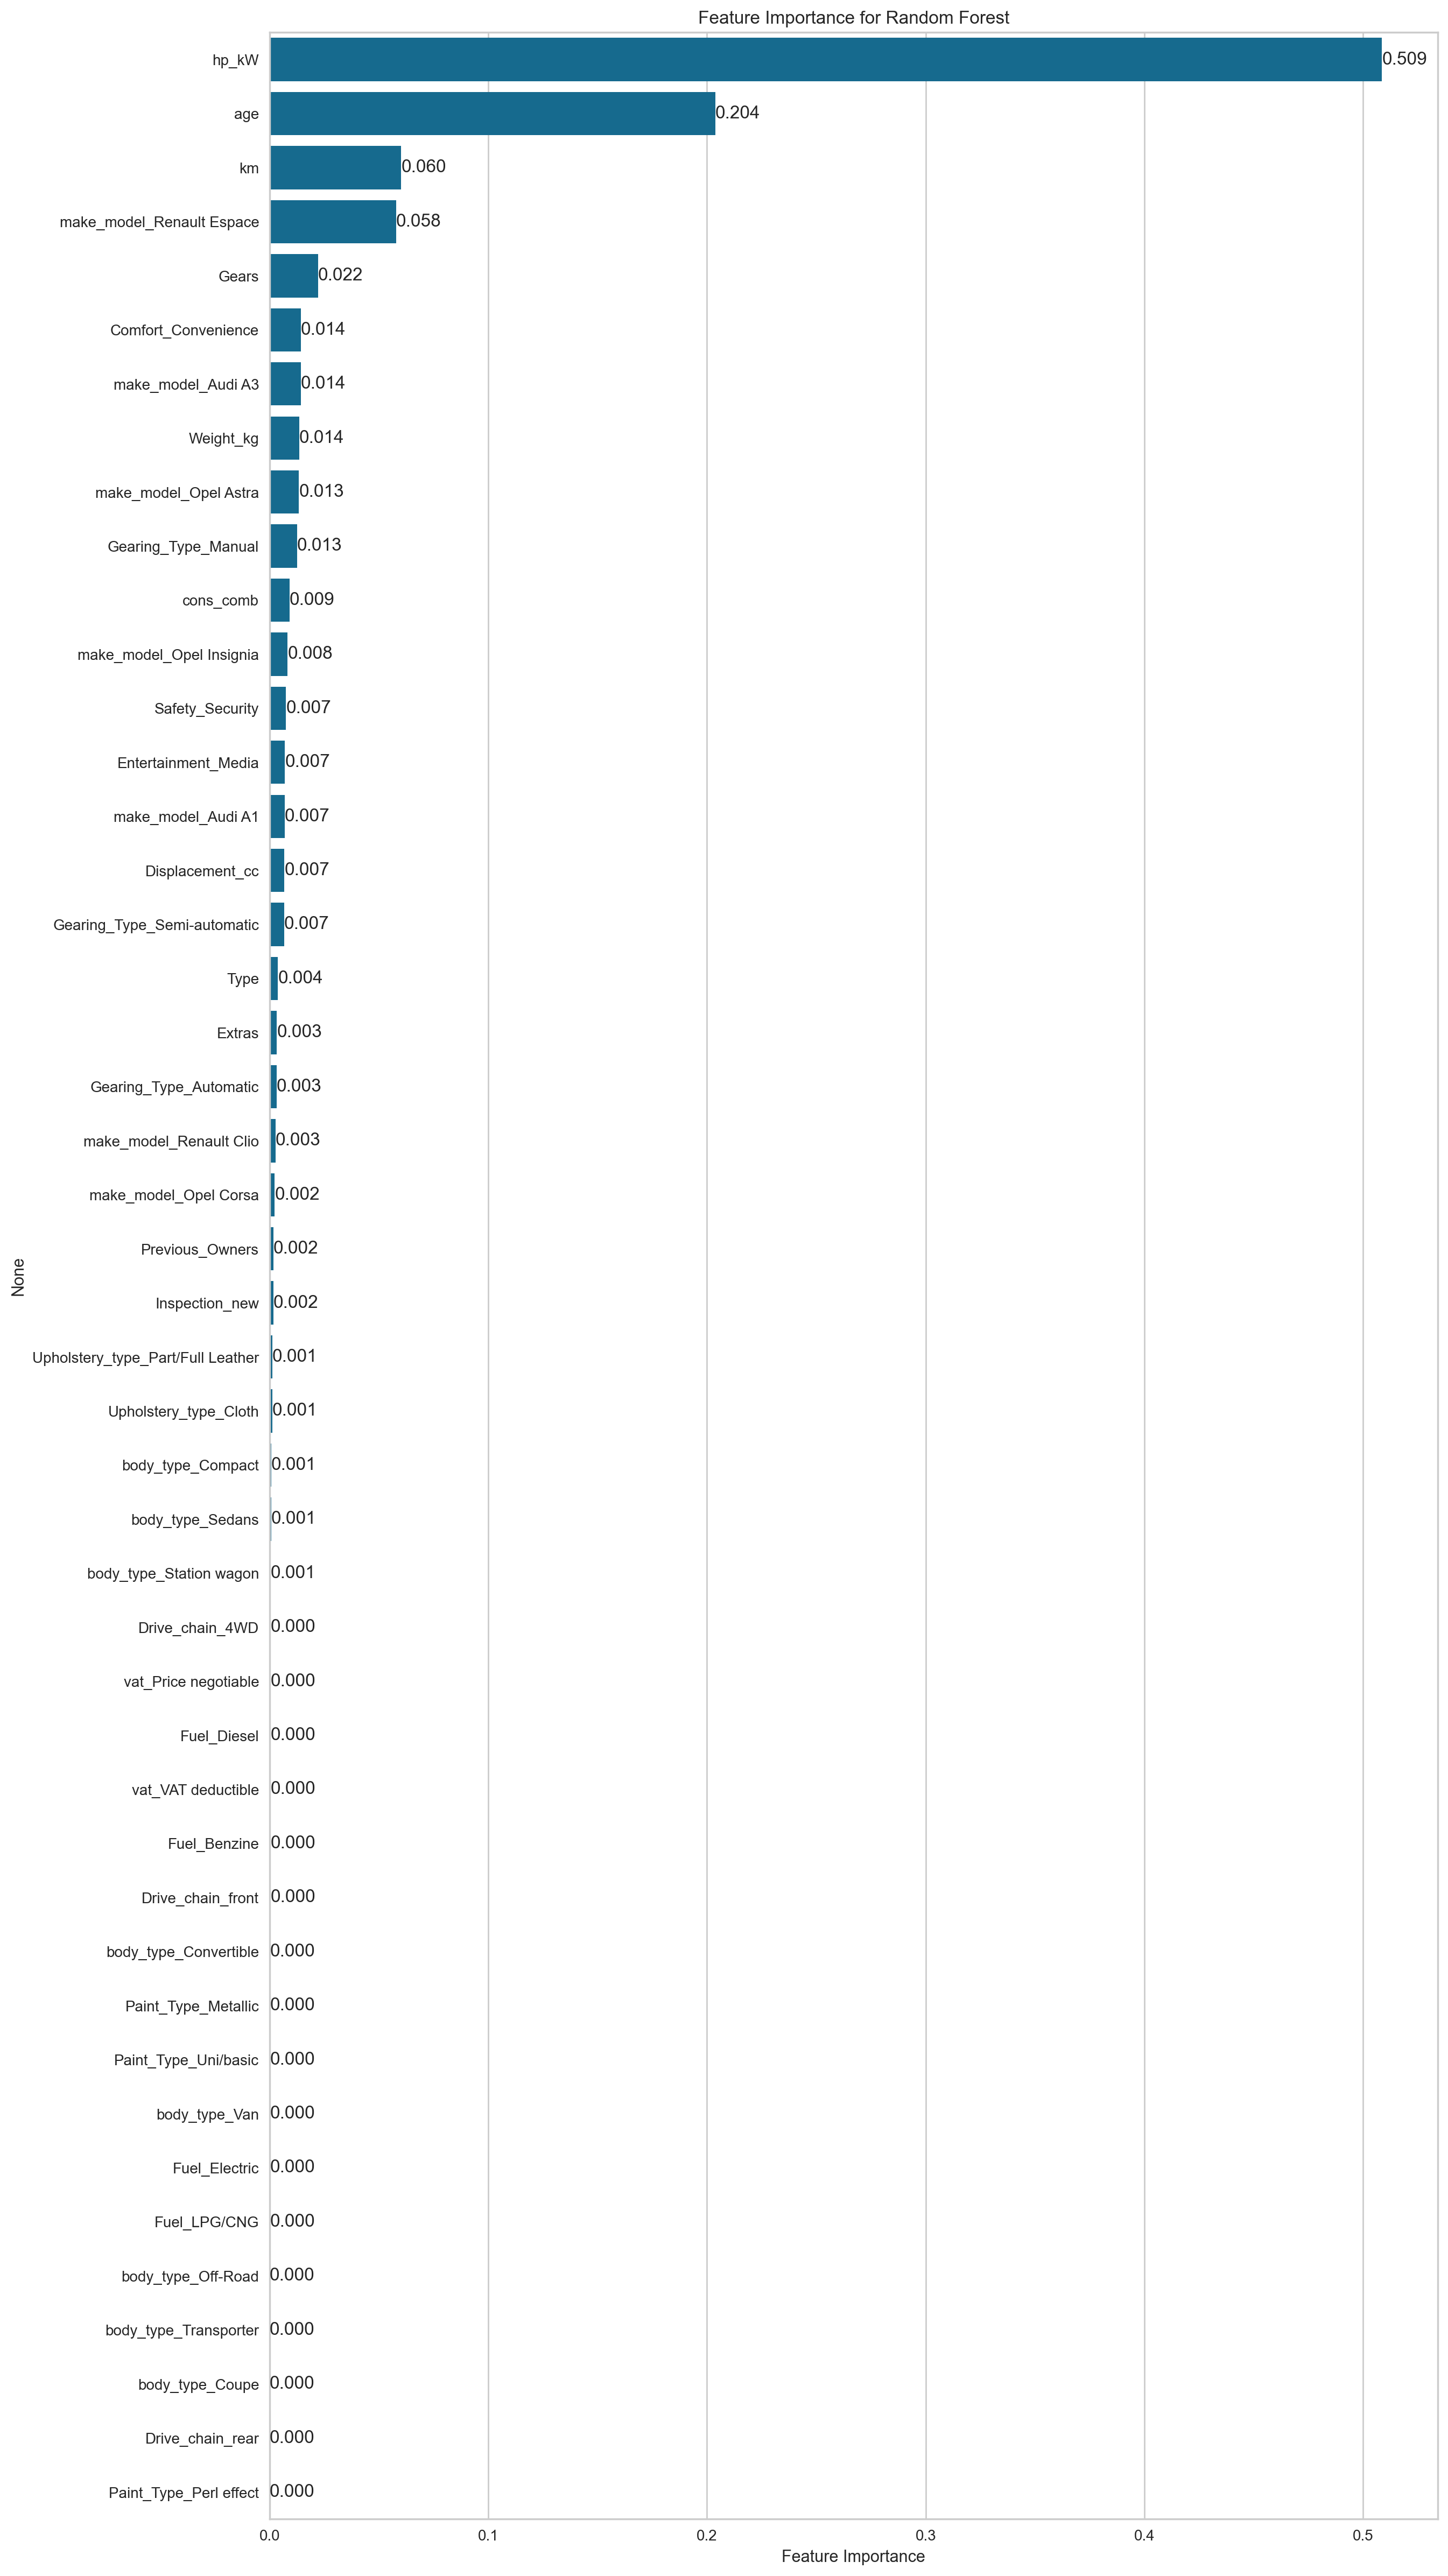

In [167]:
features = column_trans.get_feature_names_out()
features

rf_feature_imp = pd.DataFrame(data=rff.feature_importances_,
                              index = features,
                              columns=["Feature Importance"])
rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
rf_feature_imp


plt.figure(figsize=(14, 30), dpi=200)
ax = sns.barplot(x=rf_feature_imp["Feature Importance"],
                 y=rf_feature_imp.index)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()


In [113]:
print(X_train_trans.shape)

(11376, 46)


In [114]:
df_newfeature = df[["make_model", "hp_kW", "km","age", "Gears", "Comfort_Convenience", "price"]]

In [115]:
df_newfeature

,make_model,hp_kW,km,age,Gears,Comfort_Convenience,price
0,Audi A1,66.00,56013.00,3.00,7.00,16,15770
1,Audi A1,141.00,80000.00,2.00,7.00,9,14500
2,Audi A1,85.00,83450.00,3.00,7.00,13,14640
3,Audi A1,66.00,73000.00,3.00,6.00,16,14500
4,Audi A1,66.00,16200.00,3.00,7.00,13,16790
...,...,...,...,...,...,...,...
14216,Renault Espace,118.00,100.00,0.00,6.00,27,39980
14217,Renault Espace,147.00,1647.36,0.00,6.00,20,39950
14218,Renault Espace,165.00,1000.00,0.00,6.00,26,39950
14219,Renault Espace,165.00,9900.00,0.00,7.00,23,39885


In [116]:
X = df_newfeature.drop(columns = ["price"])
y = df_newfeature.price

In [117]:
X.head()

,make_model,hp_kW,km,age,Gears,Comfort_Convenience
0,Audi A1,66.00,56013.00,3.00,7.00,16
1,Audi A1,141.00,80000.00,2.00,7.00,9
2,Audi A1,85.00,83450.00,3.00,7.00,13
3,Audi A1,66.00,73000.00,3.00,6.00,16
4,Audi A1,66.00,16200.00,3.00,7.00,13


In [118]:
cat = X.select_dtypes("object").columns

In [119]:
cat

Index(['make_model'], dtype='object')

In [120]:
ord_enc = OrdinalEncoder()
column_trans = make_column_transformer((ord_enc, cat),
                                       remainder='passthrough',
                                       verbose_feature_names_out=False).set_output(transform="pandas") # remainder: # Keep other columns rather than cat in original form.

In [121]:
from sklearn.pipeline import Pipeline

operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestRegressor())])

In [122]:
my_dict = {
    "make_model": 'Audi A1',
    "hp_kW": 66.00,
    "km": 56013.00,
    "age": 3.00,
    "Gears": 7.00,
    "Comfort_Convenience": 16
    
}

In [123]:
new_obs = pd.DataFrame([my_dict])
new_obs

,make_model,hp_kW,km,age,Gears,Comfort_Convenience
0,Audi A1,66.00,56013.00,3.00,7.00,16


In [124]:
pipe_model.predict(new_obs)

array([15738.98])

In [125]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.99,0.98
mae,522.50,523.18
mse,782186.99,904817.56
rmse,884.41,951.22


In [131]:
from sklearn.pipeline import Pipeline
rfy = RandomForestRegressor(max_depth= 8, max_features = 4, n_estimators= 300,  random_state=42)
operations = [("OrdinalEncoder", column_trans), ("RF_model", rfy)]

pipe_model2 = Pipeline(steps=operations)

pipe_model2.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=8, max_features=4,
                                       n_estimators=300, random_state=42))])

In [132]:
my_dict2 = {
    "make_model": 'Audi A3',
    "hp_kW": 65.00,
    "km": 58100.00,
    "age": 3.00,
    "Gears": 6.00,
    "Comfort_Convenience": 16
    
}

In [133]:
new_dicy = pd.DataFrame([my_dict2])
new_dicy

,make_model,hp_kW,km,age,Gears,Comfort_Convenience
0,Audi A3,65.000,58100.000,3.000,6.000,16


In [134]:
prepii=pipe_model2.predict(new_dicy)
prepii

array([15089.18808447])

In [135]:
train_val(pipe_model2, X_train, y_train, X_test, y_test)

,train,test
R2,0.927,0.921
mae,1327.170,1322.839
mse,4025562.148,4295473.272
rmse,2006.380,2072.552


In [142]:
2072/df.price.mean()

0.11442820701551235

In [138]:
df.price.mean()

18107.423458265945

In [195]:
# import pickle
# pickle.dump(pipe_model, open('pipe_model', 'wb'))
# new_model = pickle.load(open('pipe_model', 'rb'))

In [126]:
import sklearn

In [127]:
sklearn.__version__

'1.2.2'

In [11]:
pip install scikit-learn==1.2.2

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.



     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.4 MB 119.1 kB/s eta 0:01:11
     ---------------------------------------- 0.0/8.4 MB 163.4 kB/s eta 0:00:51
     ---------------------------------------- 0.1/8.4 MB 192.5 kB/s eta 0:00:44
     ---------------------------------------- 0.1/8.4 MB 218.6 kB/s eta 0:00:38
     ---------------------------------------- 0.1/8.4 MB 218.6 kB/s eta 0:00:38
     ---------------------------------------- 0.1/8.4 MB 218.6 kB/s eta 0:00:38
     ---------------------------------------- 0.1/8.4 MB 180.8 kB/s eta 0:00:46
     ---------------------------------------- 0.1/8.4 MB 180.8 kB/s eta 0:00:46
     ---------------------------------------- 0.1/8.4 MB 180.8 kB/s eta 0:0

In [12]:
pip list

Package                   Version
------------------------- ------------
altair                    5.1.2
anyio                     4.0.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.13.1
beautifulsoup4            4.12.2
bleach                    6.1.0
blinker                   1.7.0
cachetools                5.3.2
certifi                   2023.11.17
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpickle               3.0.0
colorama                  0.4.6
comm                      0.2.0
contourpy                 1.2.0
cycler                    0.12.1
debugpy                   1.8.0
decorator                 5.1.1
defusedxml                0.7.1
exceptiongroup            1.1.3
executing                 2.0.1
fastjsonschema            2.19.0
fonttools         

In [143]:
import pickle
pickle.dump(pipe_model2, open('Final-Streamlit', 'wb'))
new_stream = pickle.load(open('Final-Streamlit', 'rb'))

In [ ]:
# pip install streamlit==1.22.0

In [128]:
# import pickle
# pickle.dump(pipe_model, open('Final-model', 'wb'))
# new_model = pickle.load(open('Final-model', 'rb'))